<a href="https://colab.research.google.com/github/Jackyscy/cv/blob/main/%E3%80%8CTemperature_Spread_2023RFECV_without_temp_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("2023_one hours__normal_on_state_removal Spread1 and 3.csv", parse_dates=["Date_Time"],
        index_col=["Date_Time"],)

data.head()

,GT Exhaust Outlet Temp,Turbine Speed In RPM,GT Fuel Gas Mass Flow,GT Gross MW,GT Compres Inlet Temp,GT IGV Position,GT Turbine Inlet Temperature,GT Swirl Angle,GT Efficiency Actual (LHV),GT (Expander) Efficiency,...,Turb Exhaust T/C 22,Turb Exhaust T/C 23,Turb Exhaust T/C 24,Turb Exhaust T/C 25,Turb Exhaust T/C 26,Turb Exhaust T/C 27,Turb Exhaust T/C 28,Turb Exhaust T/C 29,Turb Exhaust T/C 30,Turb Exhaust T/C 31
Date_Time,,,,,,,,,,,,,,,,,,,,,
2023-01-20 17:00:00,611.855,2999.121,13.760,231.782,18.940,87.999,1255.732,14.534,34.919,85.409,...,615.768,608.536,605.209,601.492,610.876,615.695,628.713,611.376,604.494,619.819
2023-01-20 18:00:00,604.004,3002.146,13.175,226.570,18.938,84.113,1244.014,19.430,35.239,85.504,...,607.697,606.971,595.928,589.052,595.202,609.593,616.492,608.235,600.413,600.202
2023-01-20 19:00:00,637.918,3001.744,11.979,207.629,18.780,65.027,1284.943,38.101,35.913,87.532,...,645.148,637.373,643.240,637.800,623.243,636.460,648.020,645.099,648.190,637.079
2023-01-20 20:00:00,636.447,3002.868,12.306,212.659,18.626,67.205,1283.541,33.234,35.783,87.373,...,644.380,632.764,648.446,627.277,618.795,641.789,640.982,649.530,641.044,630.275
2023-01-20 21:00:00,637.513,2998.669,11.290,193.451,17.743,60.577,1270.635,51.623,35.513,86.980,...,641.349,636.851,641.639,638.126,639.001,628.511,633.543,643.794,639.210,642.735


In [5]:
data.tail()

,GT Exhaust Outlet Temp,Turbine Speed In RPM,GT Fuel Gas Mass Flow,GT Gross MW,GT Compres Inlet Temp,GT IGV Position,GT Turbine Inlet Temperature,GT Swirl Angle,GT Efficiency Actual (LHV),GT (Expander) Efficiency,...,Turb Exhaust T/C 22,Turb Exhaust T/C 23,Turb Exhaust T/C 24,Turb Exhaust T/C 25,Turb Exhaust T/C 26,Turb Exhaust T/C 27,Turb Exhaust T/C 28,Turb Exhaust T/C 29,Turb Exhaust T/C 30,Turb Exhaust T/C 31
Date_Time,,,,,,,,,,,,,,,,,,,,,
2023-10-29 18:00:00,631.871,2999.082,12.371,209.080,26.803,76.402,1270.740,36.868,35.081,85.716,...,632.941,635.023,632.089,614.970,619.824,645.096,635.414,637.595,632.764,625.949
2023-10-29 19:00:00,626.932,3002.417,13.265,216.246,26.510,87.982,1255.402,30.070,33.778,84.150,...,628.389,626.967,614.922,612.110,632.990,627.393,636.445,629.851,626.253,630.960
2023-10-29 20:00:00,627.254,2998.286,13.206,214.829,26.462,87.990,1253.733,31.251,33.656,83.951,...,630.019,627.262,612.782,610.185,632.697,628.726,638.796,629.555,622.468,630.057
2023-10-29 21:00:00,627.054,2997.869,13.288,216.627,26.232,87.984,1255.249,29.385,33.780,84.081,...,628.844,626.230,613.153,609.790,633.529,628.954,640.118,630.300,622.481,631.250
2023-10-29 22:00:00,623.723,3001.700,13.273,216.795,25.943,88.004,1252.697,28.859,33.896,84.335,...,625.089,624.296,609.799,606.911,631.486,626.173,635.994,627.009,619.739,626.640


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2746 entries, 2023-01-20 17:00:00 to 2023-10-29 22:00:00
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   GT Exhaust Outlet Temp           2746 non-null   float64
 1   Turbine Speed In RPM             2746 non-null   float64
 2   GT Fuel Gas Mass Flow            2746 non-null   float64
 3   GT Gross MW                      2746 non-null   float64
 4   GT Compres Inlet Temp            2746 non-null   float64
 5   GT IGV Position                  2746 non-null   float64
 6   GT Turbine Inlet Temperature     2746 non-null   float64
 7   GT Swirl Angle                   2746 non-null   float64
 8   GT Efficiency Actual (LHV)       2746 non-null   float64
 9   GT (Expander) Efficiency         2746 non-null   float64
 10  GT Compres Inlet Press           2746 non-null   float64
 11  Combust Monitor Actual Spread 1  2746 non-null

<Axes: >

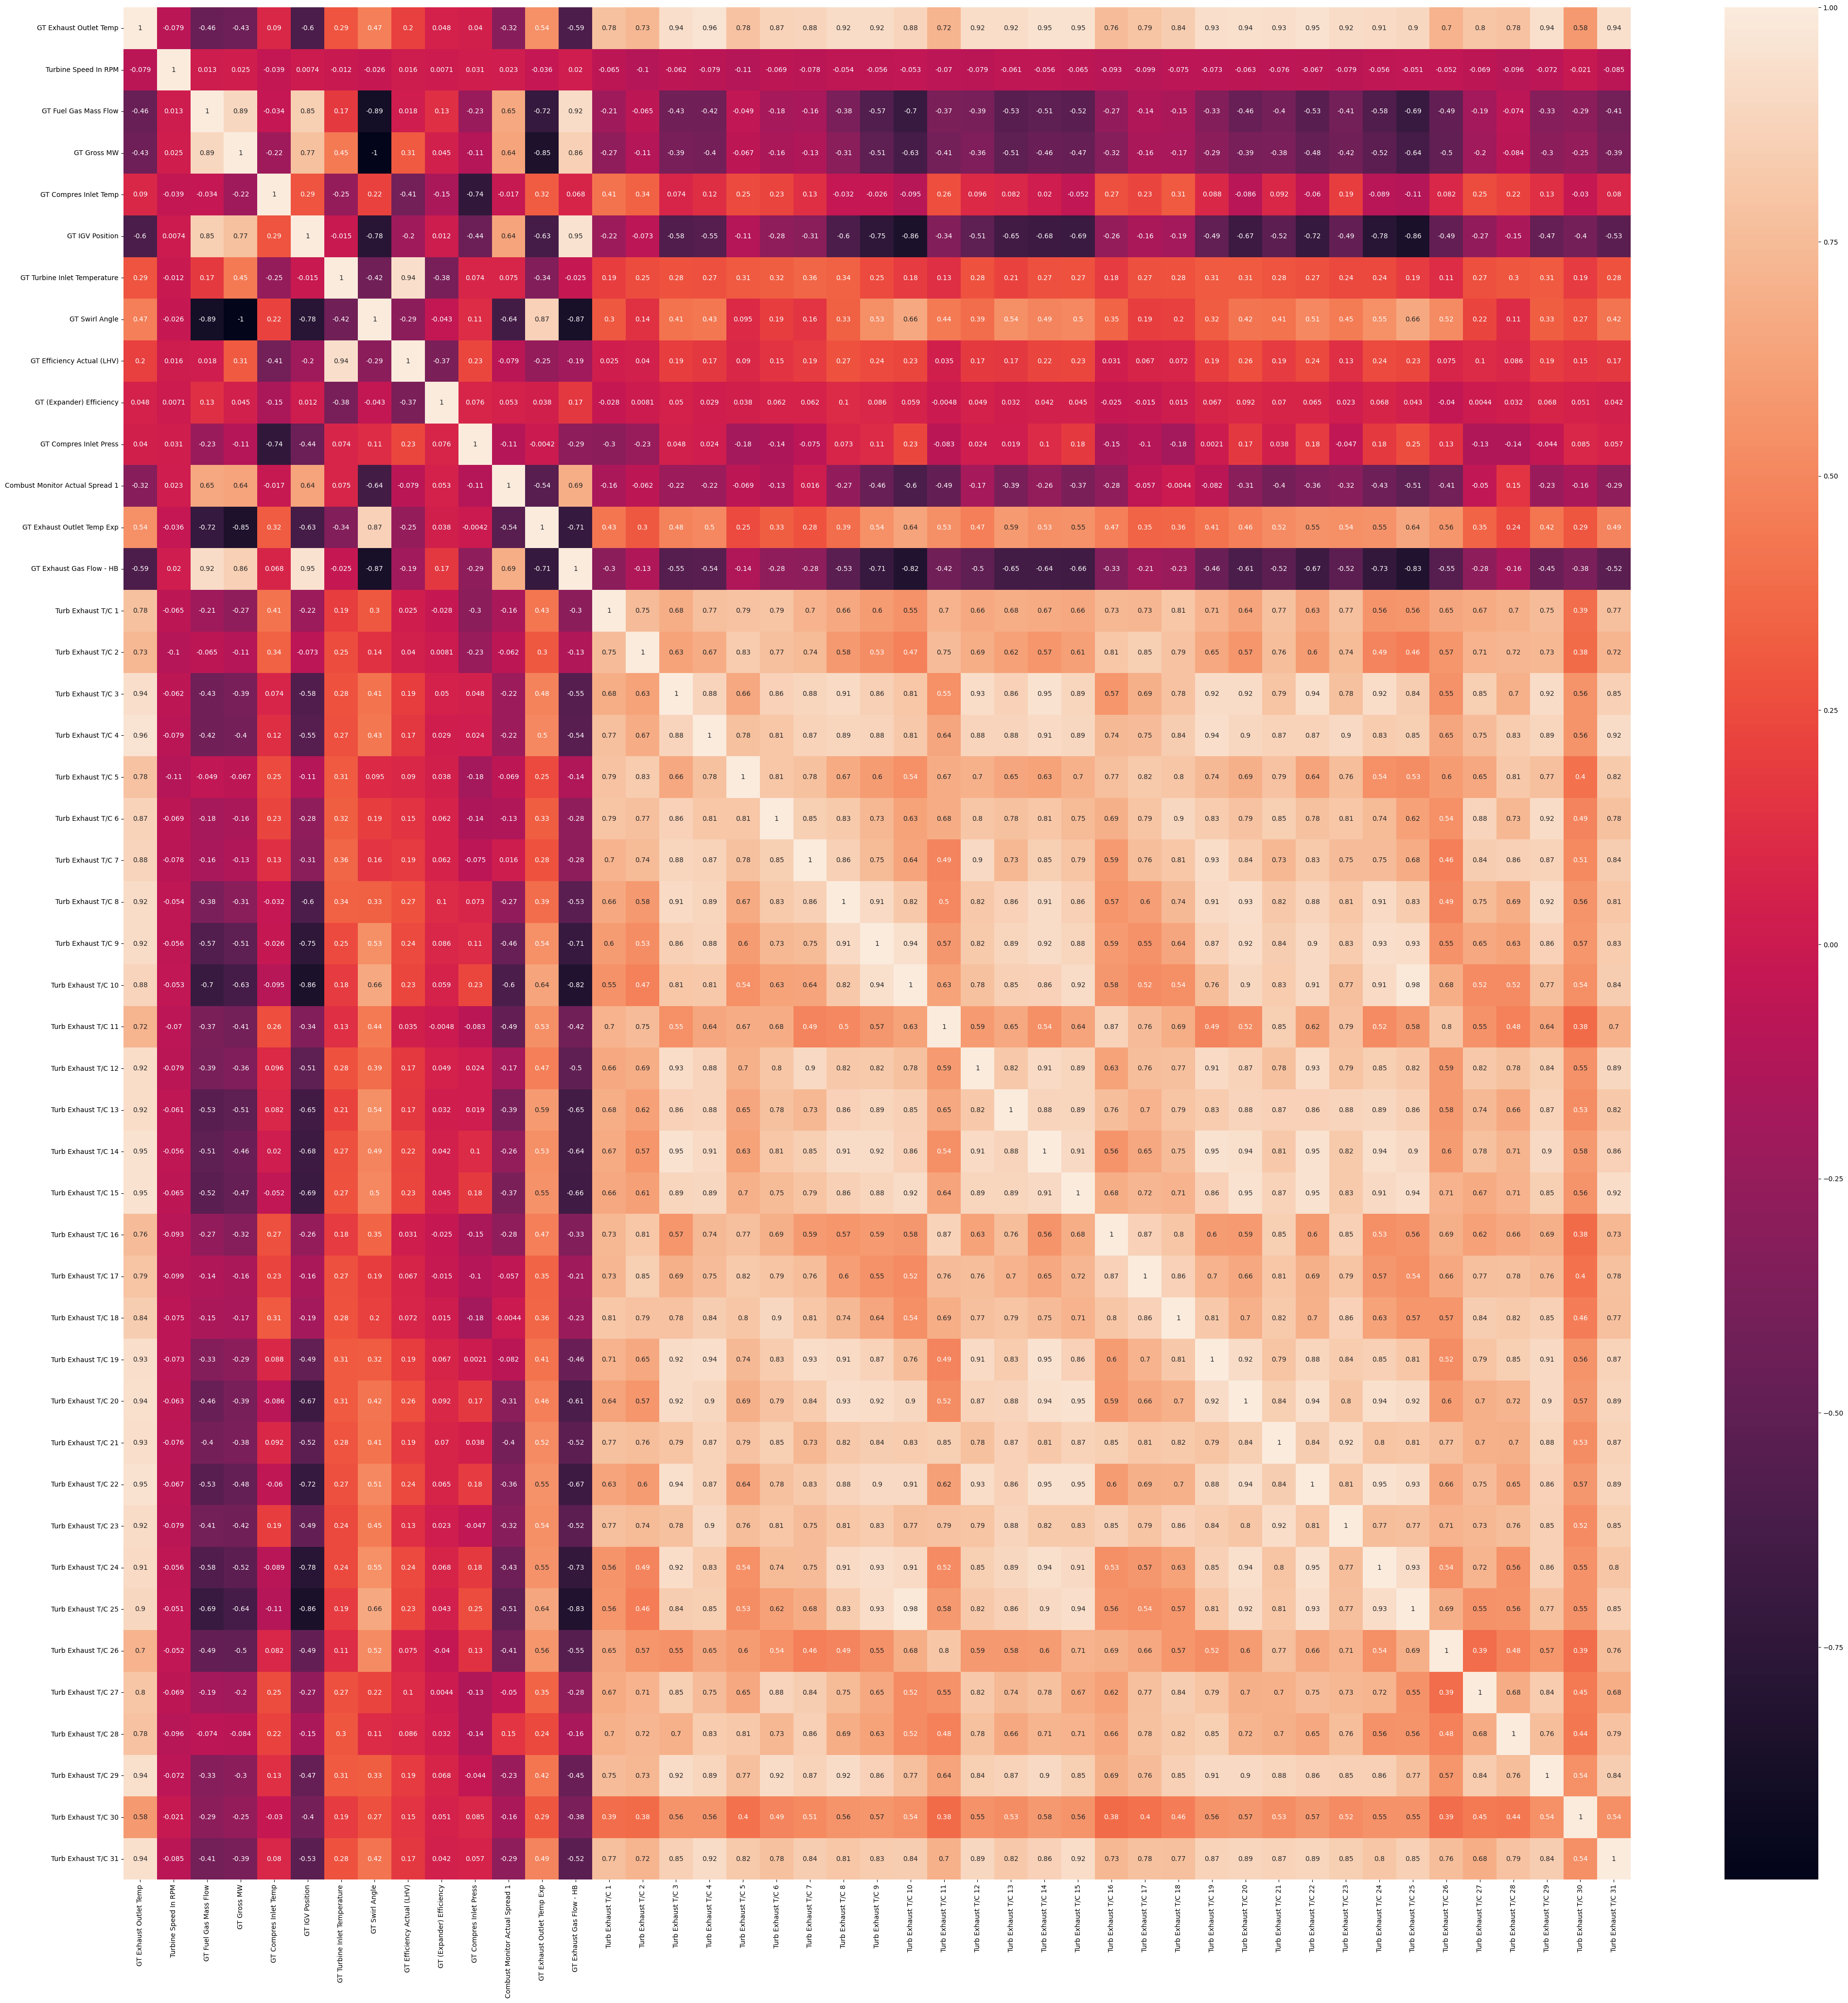

In [7]:
fig, ax = plt.subplots(figsize=(50,50))

corr = data.corr()
sns.heatmap(corr , annot = True , ax=ax)

Comment above: It is hard to see the number of correction for each features

In [8]:
#print("Slewness in Column: Combust Monitor Actual Spread 1", data["Combust Monitor Actual Spread 1"].skew)

#plt.hist(data["Combust Monitor Actual Spread 1"])
#plt.show()

Normal disctribustion can be used for the

In [9]:
#from scipy import stats

#col_cox , lam = stats.boxcox(data["Combust Monitor Actual Spread 1"])[0:2]
#print("Skewness in Column : Sqrt Combust Monitor Actual Spread 1s " ,pd.Series(col_cox).skew())

#plt.hist(col_cox)
#plt.show()

In [10]:
#data["Combust Monitor Actual Spread 1"] = col_cox

In [11]:
remaining_columns = list(data.columns)
remaining_columns.remove("Combust Monitor Actual Spread 1")

In [12]:
X = data[remaining_columns].values
Y = data['Combust Monitor Actual Spread 1'].values

In [13]:
from sklearn.model_selection import train_test_split

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [14]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

In [15]:
Xtrain.shape , Xtest.shape

((2196, 44), (550, 44))

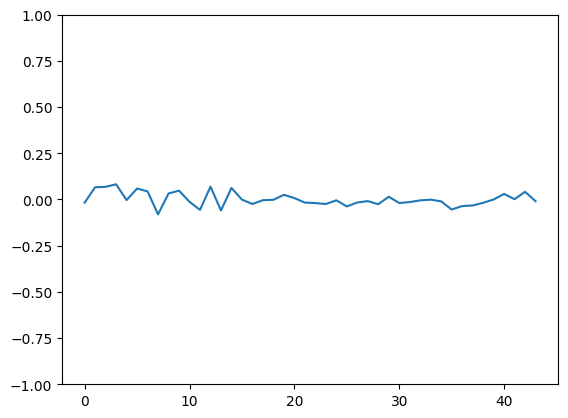

In [16]:
# check whether data is standardized or not
# mean should be 1

plt.ylim(-1,1)

means = []
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means , scaley=False)

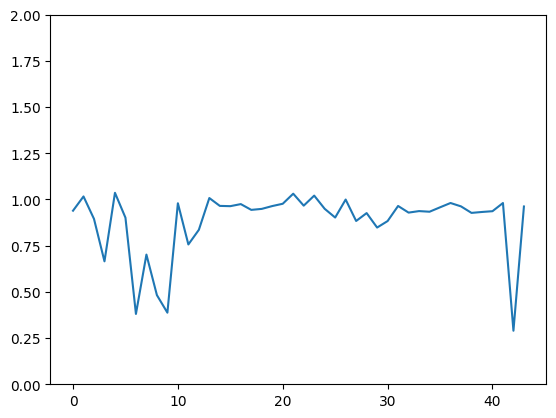

In [17]:
# Check variances

plt.ylim(0,2)

vars = []
for i in range(X.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

model = LinearRegression()
rfecv = RFECV(model , step = 1, min_features_to_select = 13 , n_jobs = -1)
rfecv.fit(Xtrain , Ytrain)

RFECV(estimator=LinearRegression(), min_features_to_select=13, n_jobs=-1)

In [19]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [20]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
selected_features = np.where(rfecv.support_)[0]
Xtrain = Xtrain[:,selected_features]
Xtest = Xtest[:,selected_features]

In [22]:
selected_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 11, 12, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43])

In [23]:
model.fit(Xtrain , Ytrain)

LinearRegression()

In [24]:
model.coef_

array([ 1.63169848,  0.06775674, -0.45146315,  1.04716701, -0.15815949,
       -2.4534096 , -0.40044572,  0.22772412,  0.29288025, -0.10233961,
        2.3344981 ,  1.14019773,  1.01150417,  0.87769642, -0.53743625,
        1.17055456, -1.06990066, -1.2899561 , -0.66481271, -4.0664515 ,
       -2.52066039, -0.2320786 , -0.20064521,  0.2337899 ,  0.17281746,
        0.88096114, -0.56616443,  0.44237738,  1.59013955, -1.47785177,
        0.38754948,  1.98939273, -0.66249487, -1.31424726,  1.18110911,
        0.26033447, -0.6712095 ,  1.59442996, -0.43351298,  0.11054315,
       -0.49258999])

In [25]:
model.intercept_

28.20286703096542

In [26]:
model.coef_.dot(Xtest[10,:]) + model.intercept_

27.819005879893552

In [27]:
model.score(Xtest , Ytest)

0.8623807456830692